In [6]:
# 2D Heat Map - Monthly Stream Temperature Contour

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
# Add the DTS_tools directory to path (adjust if needed)
# sys.path.append(r'path/to/DTS_tools')  # Uncomment and adjust if utils is not in current directory


In [7]:
def plot_monthly_water_temp_contour(xr_data, time_slice, x_slice, save_fp=None):
    
    import calendar
    
    # 1) Select the time & x-range
    T = xr_data['T'].sel(time=time_slice, x=x_slice)

    # 2) Group by calendar month and average over time
    #    Result dims: (month=1..12, x)
    T_monthly = T.groupby('time.month').mean(dim='time')

    # 3) Extract the numeric arrays for plotting
    months = T_monthly['month'].values                # [1,2,…,12]
    x_pos  = T_monthly['x'].values                    # e.g. 50…2000
    Z      = T_monthly.values                         # shape (12, N_x)

    # 4) Build the grid
    M, X = np.meshgrid(months, x_pos, indexing='xy')  # X: x_pos×month

    # 5) Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Filled contours
    cf = ax.contourf(M, X, Z.T, levels=20, cmap='RdBu_r', extend='both')
    # Overlay contour lines
    cs = ax.contour(M, X, Z.T, levels=10, colors='k', linewidths=0.5)
    ax.clabel(cs, fmt='%1.1f', fontsize=12)

    # Colorbar
    cbar = fig.colorbar(cf, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(r'$\mathrm{S_t}$ (°C)', fontsize=12)  # Using \mathrm{} for non-italic text in math mode

    # 6) Format axes (labels are non-italic since they're plain text, not math mode)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('X (m)', fontsize=12)

    # Replace month numbers with names
    ax.set_xticks(months)
    ax.set_xticklabels([calendar.month_abbr[m] for m in months], fontsize=12)

    # Add a grid
    ax.grid(True, linestyle='--', alpha=0.4)

    # Title
    start, stop = pd.to_datetime(time_slice.start), pd.to_datetime(time_slice.stop)
    # ax.set_title('Monthly Mean Stream Temperature', fontsize=12)

    plt.tight_layout()
    if save_fp:
        plt.savefig(save_fp, dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# ============================================================
# DATA PATHS - Update these paths for your local system
# ============================================================
DATA_BASE_DIR = "./data"  # Relative path from repository root

# Load DTS dataset
file = f"{DATA_BASE_DIR}/DTS/pallas_dts_data_f_6.nc"
data = xr.open_dataset(file, engine='netcdf4')

print(f"X range: {data.x.min().values} to {data.x.max().values} m")
print(f"Temperature range: {data.T.min().values:.2f} to {data.T.max().values:.2f} °C")

X range: 60.603 to 1939.633 m
Temperature range: 0.30 to 27.36 °C


In [9]:
# Check how many temperature values are below 0°C
below_zero = (data.T < 0).sum().values
total_values = data.T.size
percentage = (below_zero / total_values) * 100

print(f"Number of temperature values below 0°C: {below_zero:,}")
print(f"Total number of temperature values: {total_values:,}")
print(f"Percentage below 0°C: {percentage:.2f}%")
print(f"\nMinimum temperature: {data.T.min().values:.2f}°C")
print(f"Maximum temperature: {data.T.max().values:.2f}°C")


Number of temperature values below 0°C: 0
Total number of temperature values: 53,327,529
Percentage below 0°C: 0.00%

Minimum temperature: 0.30°C
Maximum temperature: 27.36°C


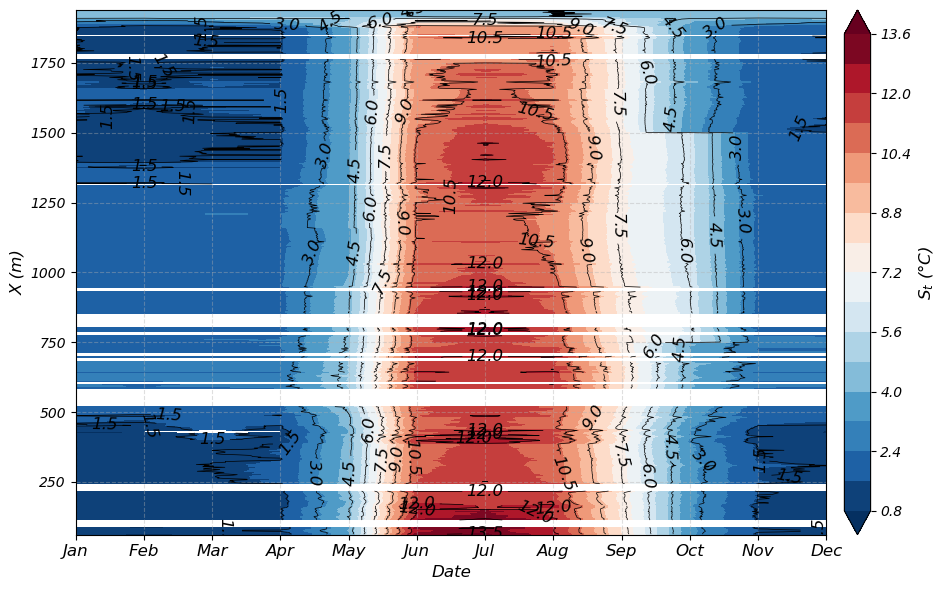

In [10]:
time_slice = slice('2021-06-01', '2023-12-30')
x_slice = slice(50, 2000)
# Generate 2D Heat Map - Monthly Stream Temperature Contour
plot_monthly_water_temp_contour(data, time_slice, x_slice)